In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from langdetect import detect, DetectorFactory
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [5]:
input = '../data/data_intermediaire_train.parquet'

In [6]:
df = pd.read_parquet(input)
df.iloc[0]['text']

'What a lovely heart warming television movie. The story tells of a little five year old girl who has lost her daddy and finds it impossible to cope. Her mother is also very distressed ..only a miracle can alleviate their unhappiness.Which all viewers hope will materialise. Samantha Mathis is brilliant as the little girl\'s mum ,as she was as the nanny in" Jack and Sarah",worth watching if you like both Samantha Mathis and happy; year tear jerking movies! Ellen Burstyn is, as, always a delightful grandmother in this tender and magnificently acted movie. Jodelle Ferland (the little five year old) is charming and a most convincing young actress. The film is based on a true story which makes it so touching."Mermaid" is a tribute to the milk of human kindness which is clearly illustrated and clearly is still all around us in this difficult world we live in. "Mermaid" gives us all hope ,by realising that there a lot of lovely people in the world with lot\'s of love to give. James Robson Gla

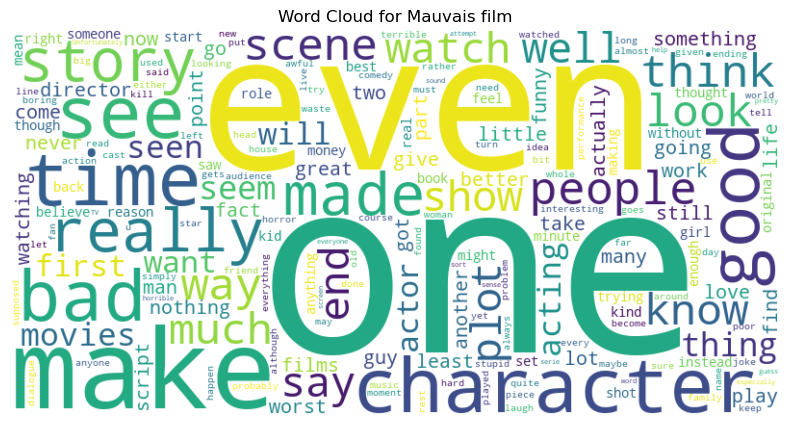

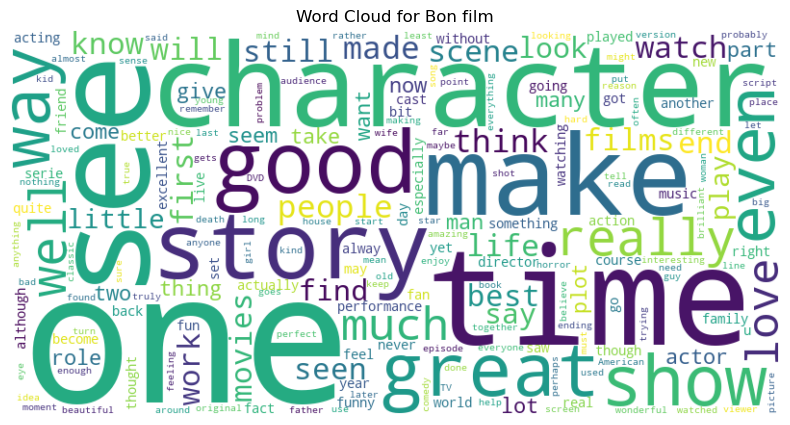

In [7]:
additional_stopwords = set(["movie","film","br"])
stopwords = STOPWORDS.union(additional_stopwords)

for label, category in [(0, "Mauvais film"), (1, "Bon film")]:
    category_data = df[df['label'] == label]['text'].str.cat(sep=' ')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(category_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category}")
    plt.show()

In [9]:
nltk.download('punkt')

DetectorFactory.seed = 0  
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['text'].apply(detect_language)

language_counts = df['language'].value_counts()
print("Distribution des langues détectées :")
print(language_counts)

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Distribution des langues détectées :
language
en    24999
nl        1
Name: count, dtype: int64


In [10]:
df[df['language']=='nl'].iloc[0]['text']

"You'd better choose Paul Verhoeven's even if you have watched it."


Statistiques sur le nombre de mots :
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: word_count, dtype: float64


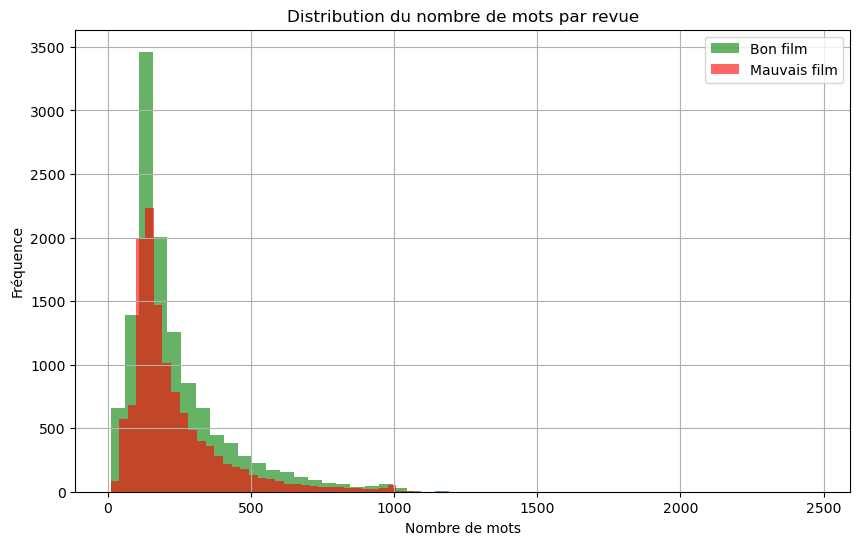

In [11]:
def count_words(text):
    if isinstance(text, str):  
        words = text.split()  
        return len(words)
    return 0

df['word_count'] = df['text'].apply(count_words)

# Affichage des statistiques globales
word_count_distribution = df['word_count'].describe()
print("\nStatistiques sur le nombre de mots :")
print(word_count_distribution)

# Séparer les données selon la catégorie
word_count_good = df[df['label'] == 1]['word_count']
word_count_bad = df[df['label'] == 0]['word_count']

# Affichage de l'histogramme superposé
plt.figure(figsize=(10, 6))
plt.hist(word_count_good, bins=50, alpha=0.6, color='green', label="Bon film")
plt.hist(word_count_bad, bins=50, alpha=0.6, color='red', label="Mauvais film")
plt.title('Distribution du nombre de mots par revue')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()